# EEG Data Analysis

In this study we analyze EEG signals of 36 participants performing an arithmetic task. Data is collected from [BURAYA LINK LAZIM]() The data was analyzed using Python in a Jupyter Notebook environment, and classification models such as Logistic Regression and Support Vector Machine (SVM) were used to determine if the arithmetic task caused any changes in brain activity. The success of the models was evaluated using model scores and confusion matrices, and the results were compared. The PCA method was also applied.


## 1. Introduction

EEG data is used in various fields to observe brain activity. In this study, we analyzed EEG data of brain activity that was observed during an arithmetic task in 36 participants who did not have any diseases or disabilities. The brain activity of the participants was measured before and after the arithmetic task using a Neurocom EEG 23-channel system (Ukraine, XAI-MEDICA) and recorded monopolarly. Data collected from 21 channels was used in this study.

The aim of this project was to determine if the arithmetic tasks caused any changes in discernable changes in recorded EEG signals of brain activity. The programming language used in the project was Python, and the environment in which the project was conducted was Jupyter Notebook. We used Logistic Regression and Support Vector Machine (SVM) for classification because the project is a classification process. Logistic Regression was chosen as a base model for classification problems, while SVM was chosen because it produces successful results with complex data. In addition to these models, the PCA method was also tried. The success of the models was assessed using the model's score and confusion matrix, and the results were compared.


## 2. Data

In this study, we analyzed Electroencephalography (EEG) data we fetched from [BURAYA LINK LAZIM](). The data was collected from 36 subjects in two conditions: resting state (1) and performing a simple arithmetic task (2). The recording condition and subject are encoded in the filenames of the data. BUNU ACIKLAMANIZ LAZIM.  

The EEG signals were recorded using 21 electrodes placed at the standard locations specified in the Standard Electrode Position Nomenclature (American Electroencephalographic Association, 1990). For each subject, each trial yielded a 21-channel EEG signal sampled at 256 Hz (i.e., 256 samples per second).

## 3. Methodology

### 3.1  Logistic Regression

In regression analysis, logistic regression is used to estimate the parameters of a logistic model. As defined by Hosmer et al. (2013), logistic regression is a "statistical method used to predict a binary outcome, such as the probability that an event will occur." While logistic regression is primarily used for binary classification, it can also be used for multiclass classification. The logistic function maps any real-valued number to a value between 0 and 1, which makes it suitable for modeling probabilities. The output of the logistic function can be interpreted as the probability of success. In binary logistic regression, the dependent variable is labeled as a dummy variable, which takes on values of 0 and 1. The independent variables can be either categorical or continuous variables.

Logistic regression begins with a linear equation, similar to linear regression. However, it involves log-odds that pass the output of the linear function through the sigmoid function and convert it to a probability between 0 and 1. Logistic regression solves this by transforming the dependent variable to logit. At this point, it is necessary to explain some concepts.

#### 3.1.1 Odds
Odds are the probability of an event occurring divided by the probability of it not occurring (or vice versa). This value can range anywhere from 0 to infinity. While this is a useful measure, a better solution is needed as it is limited to one side.

$$ odds = \frac{p}{1-p}  $$

#### 3.1.2 Log-odds
Log-odds, also known as logit, is a commonly used function in machine learning and data analysis, particularly in the field of data transformation. Since the odds expression is limited to one side, the logit function is used to expand the value range to negative infinity to infinity.

$$ logit(Y) = \ln(\frac{p}{1-p}) = \alpha + \beta x  $$

The log-odds expression is used to obtain the sigmoid function. The sigmoid function transforms a linear equation into a curve, limiting the dependent variable between 0 and 1. The steps of this process are shown below.

$$ \frac{p}{1-p} = e^{\alpha + \beta x}  $$

#### 3.1.3 Sigmoid Function
The sigmoid function has a "S"-shaped curve, which means that it has an "asymptotic" behavior. That is, as the input value x approaches negative infinity, the output value of the sigmoid function approaches 0, and as x approaches positive infinity, the output value approaches 1

$$  p = \frac{e^{\alpha + \beta x}}{1 + e^{\alpha + \beta x}}  $$

The structure of the sigmoid function can be seen from the equation below

$$ p(x) = \frac{1}{1 + e^{-(\alpha + \beta x)}}  $$

In conclusion, this is the mathematical logic behind the development of logistic regression.


### 3.2 Support Vector Machine (SVM)

`Support vector machine`(SVM)  is a type of machine learning method that is used to solve classification and regression problems. It was originally designed to solve `binary classification` problems, which means problems that have only two possible outcomes. The main goal of the SVM algorithm is to divide data points into separate groups by finding the best dividing line, called a hyperplane, in a high-dimensional space. This helps to clearly separate the points into the correct group or class.

#### 3.2.1 Principles of SVM
From a data divided into training and set, show the training data as $$ (x_n,y_n) $$ n real numbers from 1 to N'th dimension 
$$ (x_n \in R^d) $$    
$$ y_n=1\text{ or }-1 $$

If we write the hyperplane equation
$$ w^T.x-b = 0 $$

Since  W  is the normal vector of the hyperplan, (.) corresponds to the dot product.

If there is a group of data points that can be easily separated into two distinct categories, two lines (called hyperplanes) can be drawn to create a boundary between the categories. The distance between these two lines is maximized to create the best separation between the categories. The area bounded by the two hyperplanes is called the `margin`. There are two ways to work with the margin in a support vector machine (SVM) model.

#### 3.2.2 Hard Margin

The goal is to find the maximum margin (the area bounded by the two hyperplanes) and make sure that the distance from the points in this area to the hyperplanes is as small as possible If the data is distributed linearly and does not include any anomalous or extreme values, it can be considered to be free of outliers.

$$ w^T.x-b = 1 \text{ and }  w^T.x-b = -1 $$
 
The distance between the two hyperplanes $$ \frac{2}{||w||} $$ can be calculated using a mathematical formula involving the normal vector (a vector that is perpendicular to the hyperplanes). To get the maximum margin between the hyperplanes, we want to minimize the size of the normal vector W.

reprocessing to get a gradient: 
$$ \displaystyle \min_{w,b} \frac{1}{2}||w||^2 = \min_{w,b} \frac{1}{2}w ^Tw $$

This optimized process

$$ w^T.x-b \ge 1 \text{ if } y_n=1  \text{ and } w^T.x-b \le -1 \text{ if } y_n=-1 $$
Give this equation:
$$ y_n(w^T.x_n-b) \ge 1 \text{ and } \min_{w,b} \frac{1}{2}w ^Tw $$
 
#### 3.2.3 Soft Margin

If data cannot be linearly separated or when there are outliers in the data, the use of a soft margin is suitable. The SVM may identify a decision boundary with a soft margin that is less sensitive to the existence of these outliers

$$ y_n(w^T.x_n-b) \ge 1 - \varepsilon_i \text{ and } \varepsilon_i \ge 0 $$

$$ \displaystyle \min_{w,b,\varepsilon_i} \frac{1}{2}||w||^2 + C\sum_{i = 1}^{n}\varepsilon_i $$

The cases where C is a large number and a small number should be evaluated.

#### 3.2.4 Kernel 

SVM uses the Kernel Method. Data are stored as kernels according to their changes or the sameness.Kernel functions are used to analyze data that can take different forms, such as sequences, graphs, text, images, and vectors. The most commonly used kernel function is the radial basis function (RBF), which has a localized and finite response across the entire range of possible values for the input variable. Kernel functions work by calculating the inner product between two points in a transformed feature space, allowing for the comparison of similarity between the points with relatively low computational cost, even when working with high-dimensional data. This function is used to support equations used for SVM.

#### Gaussian Kernel:

$$ k(x,y) = exp(-\frac{||x-y||^2}{2\sigma^2}) $$

#### Gaussian Kernel Radial Basis Function:

$$ k(x_i,x_j)=exp(-\gamma||x_i-x_j||^2) $$

#### Sigmoid Kernel:

$$ k(x,y) = tanh(\alpha x^Ty+c) $$
 
#### Hyperbolic Tangent Kernel:

$$ k(x,y) = tanh(\kappa x_i.x_j+c) $$

#### Polynomial Kernel:

$$ k(x_i,x_j) = (x_i.x_j+1)^d $$

## 4. Experiment

### Importing Libraries

First, we need to load all the helper libraries to be used in code. These are

1. ``numpy``: Numpy is a library that facilitates mathematical operations on large arrays and arrays.

2. ``pandas``: Pandas is used to process, analyze and manipulate data.

3. ``mne``: This is a python package that allows working with EEG and MEG data. It allows us to read EEG data.

4. ``glob``: The recorded signals consist of 70 files with `.edf` extension. The glob module in python was used to be able to read these files. Glob module helps to list specific files in folder.

5. ``os``: The module provides support for using files and folders between operating systems.

6. ``matplotlib.pyplot``: The module contains the utilty functions to visualize data.

In [4]:
from glob import glob
import os # linux veya windows dizinleri için
import mne # Open;-source Python package for exploring, visualizing, and analyzing human neurophysiological data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
%%capture

all_file_path=glob('Data/*.edf') # list şeklinde
all_file_path[0]

IndexError: list index out of range

The data folder's files are imported into the working environment using the glob module. A test was conducted using the first index (0) to view the file names.

In [3]:
before_test=[i for i in all_file_path if '1' in i.split('_')[1]]
during_test=[i for i in all_file_path if '2' in i.split('_')[1]]
print(len(before_test),len(during_test))

36 36


As previously mentioned, each subject has two data sets recorded in separate files, one for the resting state and the other for the arithmetic task. This information is encoded in the file name. Files with names containing a `1` represent data from subjects in the resting state, while files with names containing a `2` represent data collected during arithmetic tasks. The `len()` function is applied to determine the lengths of the lists, which are found to be the same.

###  4.1 Sample Data

The data is recorded in [European Data Format (EDF)](https://en.wikipedia.org/wiki/European_Data_Format) format. In order to examine the data we needed to ingest the data using `mne` library. Specifically, we used `io.read_raw_edf` function in the `mne`. In order to load the data faster, the memory was preloaded with the `preload` parameter.




In [3]:
%%capture
from random import randint


m = randint(0,36)
data1=mne.io.read_raw_edf(before_test[m],preload=True)
data2=mne.io.read_raw_edf(during_test[m],preload=True)

print(len(data1),len(data2))

NameError: name 'mne' is not defined

After the files were transferred to the lists, the files of a trial subject before and after the arithmetic test were examined using the `io.read_raw_edf` function of the mne library. This procedure was performed on randomly selected people using the `randint` function.

The lengths of both data sets (data recorded at rest and data recorded during arithmetic tasks) for a random subject were checked using the `len` function. It was observed that the data set recorded during the resting state is larger. When the same procedure was repeated for different subjects, it was found that the data sets recorded at rest and during arithmetic tasks do not necessarily have the same length.




###  4.2 Data Information

Below, the general information about the data is displayed for a random subject. This information includes upper and lower frequency limits, number of channels, filename and processing time. It has been determined that the high pass and low pass values vary for different subjects.

In [5]:
data1

<RawEDF | Subject28_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>

In [6]:
data2

<RawEDF | Subject28_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>

### 4.3 Plot


Using matplotlib as 2D backend.
Opening raw-browser...


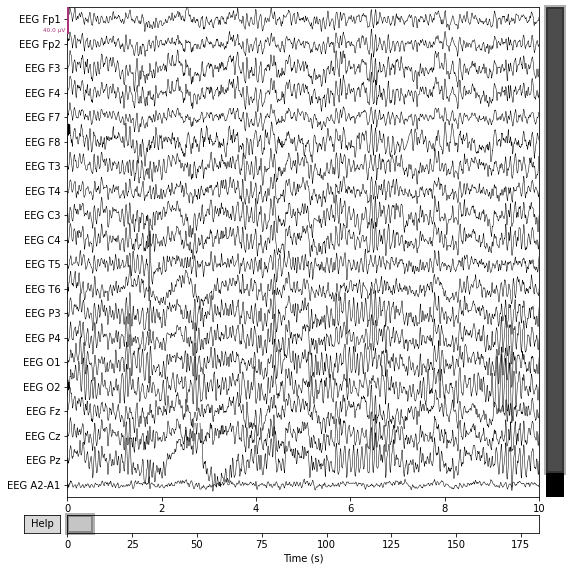

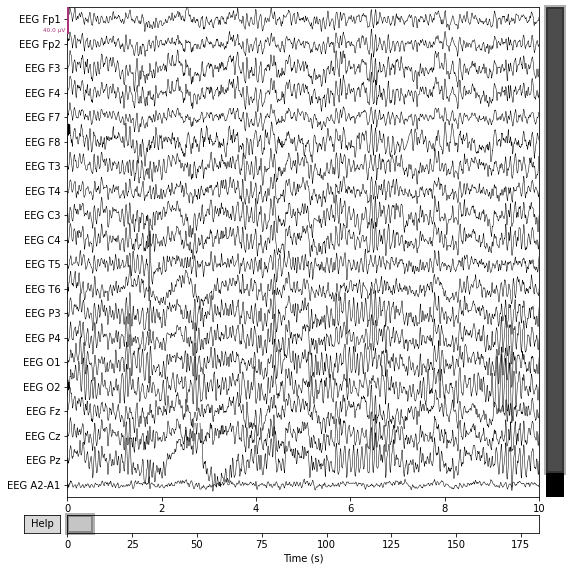

In [7]:
data1.plot()

Opening raw-browser...


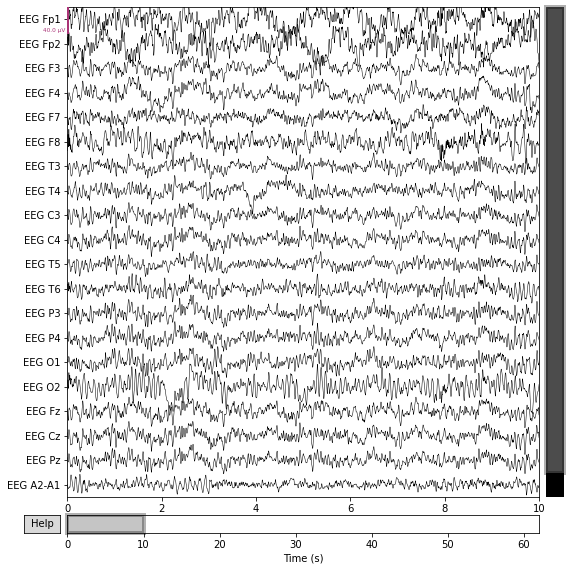

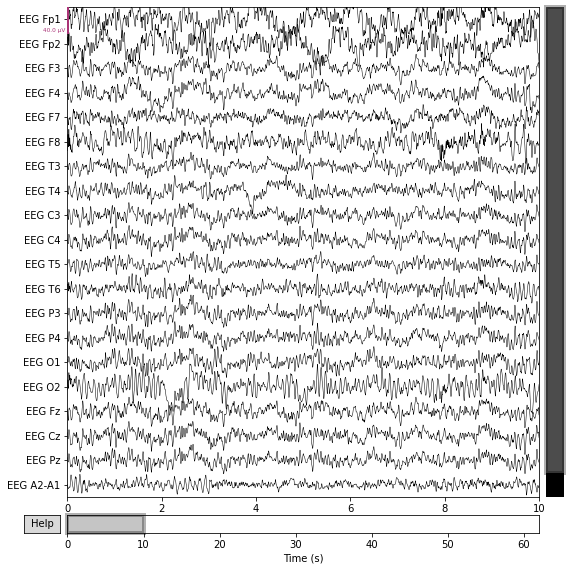

In [8]:
data2.plot()


### 4.4 read_data function
 
After examining the sample person's data, the read_data function was created to read all people's data in a single function. The details of this function are as follows;
 
 1-) `mne.io.read_raw_edf`:For reading files process, io.read_raw_edf() function in the mne library is used.
 
 2-) `data.filter`: This function determines the maximum and minimum frequency values in the data of individuals and brings the frequencies within this range.
 
 3-) ``mne.make_fixed_length_epochs``: In the function, the data is split into 5 second chunks and the length of overlap between chunks is 1 second.
  
 4-) ``epochs.get_data()``: This function converts data to array format.
 
 

In [9]:
def read_data(file_path):
    
    data=mne.io.read_raw_edf(file_path,preload=True)
    data.filter(l_freq=0,h_freq=45)
    epochs=mne.make_fixed_length_epochs(data,duration=5,overlap=1) 
    array=epochs.get_data() 
    return array
    
    

In [10]:
%%capture
sample_data1=read_data(before_test[4])
sample_data2=read_data(during_test[4])


In [11]:
print(sample_data1.shape,sample_data2.shape)

(42, 21, 2500) (15, 21, 2500)


This operation changed the structure of the data. The 2-dimensional data consisting of 21 channels and the signals in each channel turned into a 3-dimensional data

In [12]:
%%capture 

before_epochs_list=[read_data(i) for i in before_test] 
during_epochs_list=[read_data(i) for i in during_test]

In [13]:
print(len(before_epochs_list),len(during_epochs_list)) 

36 36


The data from each experiment was inserted into a function and placed into two lists called `before_epochs_list` and `during_epochs_list`.

### 4.5 Labeling

In [14]:
before_epochs_labels=[len(i)*[0] for i in before_epochs_list]
during_epochs_labels=[len(i)*[1] for i in during_epochs_list]
len(before_epochs_labels),len(during_epochs_labels) 

(36, 36)

Later, the before_epochs_labels and during_epochs_labels lists were created from the lists created in the previous step to be used when estimating. The label 0 was assigned to the data collected before the arithmetic test, while the label 1 was assigned to the data collected during the arithmetic process. The arrays created for labeling are one-dimensional arrays.

In [15]:
data_list= before_epochs_list + during_epochs_list
label_list= before_epochs_labels + during_epochs_labels 

print(len(data_list),len(label_list))

72 72


``data_list`` is created by adding before_epochs_array and during_epochs_array end-to-end. The same action was applied to the before_epochs_labels and during_epochs_labels lists to create the ``label_list``. 

#### 4.5.1 Group Label



In [16]:
group_list=[[i]*len(j) for i,j in enumerate(data_list)] # her gruptaki insanın grup numarasını işaretliyoruz
len(group_list)

72

At this stage, the group_label array was also created, with labels given to each of the 72 experiments. However, as will be understood in the subsequent steps, using this array as the dependent variable caused the model to be overfitted.

In [17]:
data_array=np.vstack(data_list) # (vertical) 
label_array=np.hstack(label_list) # (horizontal)
print(data_array.shape, label_array.shape)


(2132, 21, 2500) (2132,)


The data_list is a list that holds arrays with epochs from each research, and the label_list holds the labeled values for each research. Therefore, it is necessary to combine the items in these lists. The vstack and hstack functions are used for this task. While vstack is a function that adds arrays vertically, hstack is a function that adds arrays horizontally. Therefore, vstack is used when performing this operation on the data_list. The resulting arrays are named data_array and list_array, with data_array being a 3-dimensional array and list_array being a one-dimensional array.

## 5. Model and Prediction

In [18]:
x=data_array
x.shape


(2132, 21, 2500)

In [19]:
y=label_array
y.shape

(2132,)

The x and y variables were determined, with data_array being taken as the argument for x and label_array being taken as the argument for y.

In [20]:
from collections import Counter
Counter(y)

Counter({0: 1592, 1: 540})

Before starting the estimation, the numbers ``1`` and ``0`` in the dependent variable were examined using the ``Counter`` module.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

### 5.1 All Data

In [22]:
def Models(X,y,Model):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = None)
    a,b,c=X_train.shape
    d,e,f=X_test.shape
    X_train_shape=X_train.reshape(a,b*c) 
    X_test_shape=X_test.reshape(d,e*f)
    if Model=='LR':
        logisticRegr = LogisticRegression(solver = 'liblinear')
        logisticRegr.fit(X_train_shape,y_train)
        y_pred=logisticRegr.predict(X_test_shape)
        y_pred = logisticRegr.predict(X_test_shape)
        return logisticRegr.score(X_test_shape, y_test), confusion_matrix(y_test,y_pred)
    else:
        model = SVC(kernel='rbf',C=2.5)
        model.fit(X_train_shape,y_train)
        y_pred = model.predict(X_test_shape)
        confusion_matrix(y_test,y_pred)
        return model.score(X_test_shape,y_test) , confusion_matrix(y_test,y_pred)

In order to train the model and measure its accuracy, the data was divided into two parts as train and test. The size of the test data is set to 20%. The random_state parameter is set to none so that it shuffles the data each time the model runs.

x_train and x_test data have been brought to the appropriate size for the model, since a 3-dimensional array is not given for x data in the model. 

Since the data array is 3-dimensional, it is necessary to arrange the shapes after the data is separated into train and test. While the first dimension with the epochs remained the same, the 2nd and 3rd dimensions were multiplied, reducing the argument array to 2 dimensions.

#### 5.1.1 Dummy Model

Initially, labels were assigned to the variable ``y`` from the ``label_array``. After the outputs of the Logistic and SVM models were observed, it was decided to recreate the models using randomly labeled data that could serve as a baseline. To do this, an array of size ``label_array`` with random 0s and 1s was intended to be created and subsequently, the outputs of the ``score`` and the confusion matrix of the model were intended to be observed. Using the ``random`` library and the ``random.randint()`` function within a for loop, either 0 or 1 was randomly assigned according to the specified size.

In [23]:
size = label_array.shape[0]


y_random = []


for i in range(size):
    y_random.append(randint(0, 1))

The features (x values) and labels (y values) created for training and testing the model were split into training and test sets using the train_test_split function, with 80% of the data being used for training and 20% for testing. This allows us to train the model using the 80% training set and evaluate its performance using the 20% test set. This helps us to accurately assess the model's general performance and understand how well it has learned the relationship between the input features and expected labels from the training data

The X_train and X_test were reshaped using the `reshape` function to convert them into 2-dimensional `nd.array` format, in order to use a suitable shape for the models. This allows us to use the reshaped data with our model and ensures that the data is in a compatible format for input into the model.
The models are called in sequence from the function shared by the models, and the random-labeled model is tested. This involves using the function to call each of the models in turn and then evaluating the performance of the model with randomly labeled data. This helps us to understand how well the model is able to make predictions based on the input data and determine its effectiveness in solving the problem at hand.

DUMMY MODEL ICIN ASAGIDAKI GIBI CONFUSION MATRIX YAPMANIZ LAZIM. MODEL EVALUATION ICIN O CM'IN DIAGONALINDEKI TERIMLERIN TOPLAMINI CM ICINDEKI BUTUN TERIMLERIN TOPLAMINA BOLUYORSUNUZ. SIZIN ASAGIDA y_random ICIN YAPTIGINIZ HESAPLAR YANLIS.

In [ ]:
confusion_matrix(y,y_random)


In [47]:
score, conf_matrix = Models(x,y_random,'LR')
score,conf_matrix

(0.4918032786885246,
 array([[210,   0],
        [217,   0]], dtype=int64))

In [48]:
score, conf_matrix = Models(x,y_random,'SVM')
score,conf_matrix 

(0.5081967213114754,
 array([[115, 112],
        [ 98, 102]], dtype=int64))

BUNUN SONRASI OKAY.

#### 5.1.2 Logistic Regression

In [49]:
score, conf_matrix = Models(x,y,'LR')
score,conf_matrix 


(0.7517564402810304,
 array([[321,   0],
        [106,   0]], dtype=int64))

Initially, logistic regression was employed for estimation. The liblinear hyperparameter was selected for use. After running the model, the score and confusion matrix were examined.

#### 5.1.3 SVM

In [50]:
score, conf_matrix = Models(x,y,'SVM')
score,conf_matrix

(0.7306791569086651,
 array([[305,  18],
        [ 97,   7]], dtype=int64))

SVM was also applied to the dataset with all subjects. In the SVM model, rbf was chosen as the hyperparameter and the C value was given as 2.5. Confusion matrix and score were checked.

### 5.2 One by One Data Prediction 

In [28]:
Svm_scores = {}
Svm_confusion = {}
logistic_scores = {}
logistic_confusion = {}

def one_by_one(before,during,model,i):
    
    data_before=mne.io.read_raw_edf(before,preload=True)
    data_before.filter(l_freq=0,h_freq=45)
    epochs_before=mne.make_fixed_length_epochs(data_before,duration=5,overlap=1) # Divide continuous raw data into equal-sized consecutive epochs.
    array_before=epochs_before.get_data()# to_array..in some cases the to_data_frame function can be used
    label_array_before= len(array_before)*[0]
    
    data_during=mne.io.read_raw_edf(during,preload=True)
    data_during.filter(l_freq=0,h_freq=45)
    epochs_during=mne.make_fixed_length_epochs(data_during,duration=5,overlap=1) # Divide continuous raw data into equal-sized consecutive epochs.
    array_during=epochs_during.get_data()
    label_array_during= len(array_during)*[1]
    
    array_data = np.vstack((array_before,array_during))
    array_label = np.hstack((label_array_before, label_array_during))
    a,b,c=array_data.shape
    array_data_shape=array_data.reshape(a,b*c)
    array_label_shape=array_label.ravel()
    
    X_train, X_test, y_train, y_test = train_test_split(array_data_shape, array_label_shape, test_size = 0.5)

    if(model=='LR'):
        logisticRegr = LogisticRegression(solver = 'liblinear')
        logisticRegr.fit(X_train,y_train)
        y_pred=logisticRegr.predict(X_test)
        logisticRegr.score(X_test, y_test)

        y_pred = logisticRegr.predict(X_test)
        logistic_scores[i]=((logisticRegr.score(X_test,y_test)))
        logistic_confusion[i]=confusion_matrix(y_test,y_pred)
    
    else:
        model = SVC(kernel='rbf',C=2.0)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        Svm_scores[i]=((model.score(X_test,y_test)))
        Svm_confusion[i]=confusion_matrix(y_test,y_pred)



As a result of the function created above, the data of a person was examined. Before_test_array and during_test_array lists are created and added to all people with the help of comprehension.

In [29]:
%%capture
for i in range(0,36):
    one_by_one(before_test[i],during_test[i],'SVM',i)
    one_by_one(before_test[i],during_test[i],'LR',i)

#### 5.2.1 SVM

ASAGIDAKI SONUCLARA T-TEST YAPARSANIZ %95 CONFIDENCE INTERVAL CIKAR. BU DA SVM ICIN ACCURACY +- ERROR SEKLINDE SONUC VERIR. BU DA YETERLI.

In [30]:
Svm_scores

{0: 0.9,
 1: 0.7333333333333333,
 2: 0.9666666666666667,
 3: 0.7666666666666667,
 4: 0.7586206896551724,
 5: 0.7333333333333333,
 6: 0.8333333333333334,
 7: 0.7666666666666667,
 8: 0.7666666666666667,
 9: 0.8,
 10: 0.8387096774193549,
 11: 0.7666666666666667,
 12: 0.7666666666666667,
 13: 1.0,
 14: 0.7333333333333333,
 15: 0.7333333333333333,
 16: 0.7333333333333333,
 17: 0.7666666666666667,
 18: 0.7666666666666667,
 19: 0.7333333333333333,
 20: 1.0,
 21: 0.7333333333333333,
 22: 0.7,
 23: 0.8333333333333334,
 24: 0.7,
 25: 0.7666666666666667,
 26: 0.8,
 27: 0.7,
 28: 0.7333333333333333,
 29: 0.9,
 30: 0.7333333333333333,
 31: 0.47058823529411764,
 32: 0.8,
 33: 0.8666666666666667,
 34: 0.7333333333333333,
 35: 1.0}

CONFUSION MATRISLERINE GEREK YOK.

In [31]:
Svm_confusion

{0: array([[26,  0],
        [ 3,  1]], dtype=int64),
 1: array([[22,  0],
        [ 8,  0]], dtype=int64),
 2: array([[21,  1],
        [ 0,  8]], dtype=int64),
 3: array([[23,  0],
        [ 7,  0]], dtype=int64),
 4: array([[22,  0],
        [ 7,  0]], dtype=int64),
 5: array([[22,  0],
        [ 8,  0]], dtype=int64),
 6: array([[25,  0],
        [ 5,  0]], dtype=int64),
 7: array([[23,  0],
        [ 7,  0]], dtype=int64),
 8: array([[23,  0],
        [ 7,  0]], dtype=int64),
 9: array([[24,  0],
        [ 6,  0]], dtype=int64),
 10: array([[26,  0],
        [ 5,  0]], dtype=int64),
 11: array([[23,  0],
        [ 7,  0]], dtype=int64),
 12: array([[23,  0],
        [ 7,  0]], dtype=int64),
 13: array([[22,  0],
        [ 0,  8]], dtype=int64),
 14: array([[22,  0],
        [ 8,  0]], dtype=int64),
 15: array([[22,  0],
        [ 8,  0]], dtype=int64),
 16: array([[22,  0],
        [ 8,  0]], dtype=int64),
 17: array([[23,  0],
        [ 7,  0]], dtype=int64),
 18: array([[23,  0]

#### 5.2.2 Logistic Regression 

BU DA AYNI SEKILDE.

In [32]:
logistic_scores

{0: 0.7333333333333333,
 1: 0.7666666666666667,
 2: 0.7,
 3: 0.7333333333333333,
 4: 0.7586206896551724,
 5: 0.8,
 6: 0.6666666666666666,
 7: 0.8333333333333334,
 8: 0.7333333333333333,
 9: 0.7666666666666667,
 10: 0.7419354838709677,
 11: 0.8,
 12: 0.7,
 13: 0.7666666666666667,
 14: 0.7,
 15: 0.7666666666666667,
 16: 0.7666666666666667,
 17: 0.6333333333333333,
 18: 0.7333333333333333,
 19: 0.7666666666666667,
 20: 0.7666666666666667,
 21: 0.8,
 22: 0.6333333333333333,
 23: 0.8,
 24: 0.7333333333333333,
 25: 0.7,
 26: 0.7666666666666667,
 27: 0.7666666666666667,
 28: 0.7333333333333333,
 29: 0.7666666666666667,
 30: 0.7666666666666667,
 31: 0.5882352941176471,
 32: 0.7333333333333333,
 33: 0.8,
 34: 0.7666666666666667,
 35: 0.8}

In [33]:
logistic_confusion

{0: array([[22,  0],
        [ 8,  0]], dtype=int64),
 1: array([[23,  0],
        [ 7,  0]], dtype=int64),
 2: array([[21,  0],
        [ 9,  0]], dtype=int64),
 3: array([[22,  0],
        [ 8,  0]], dtype=int64),
 4: array([[22,  0],
        [ 7,  0]], dtype=int64),
 5: array([[24,  0],
        [ 6,  0]], dtype=int64),
 6: array([[20,  0],
        [10,  0]], dtype=int64),
 7: array([[25,  0],
        [ 5,  0]], dtype=int64),
 8: array([[22,  0],
        [ 8,  0]], dtype=int64),
 9: array([[23,  0],
        [ 7,  0]], dtype=int64),
 10: array([[23,  0],
        [ 8,  0]], dtype=int64),
 11: array([[24,  0],
        [ 6,  0]], dtype=int64),
 12: array([[21,  0],
        [ 9,  0]], dtype=int64),
 13: array([[23,  0],
        [ 7,  0]], dtype=int64),
 14: array([[21,  0],
        [ 9,  0]], dtype=int64),
 15: array([[23,  0],
        [ 7,  0]], dtype=int64),
 16: array([[23,  0],
        [ 7,  0]], dtype=int64),
 17: array([[19,  0],
        [11,  0]], dtype=int64),
 18: array([[22,  0]

In the previous step, estimation was performed on all the data. In this step, estimation was conducted on the data of a randomly selected subject using the ``randint`` function. Both ``logistic regression`` and ``support vector machine (SVM)`` were employed for estimation. The confusion matrix of the resulting models was analyzed.

### 5.3 One by One Data Prediction with PCA

In [34]:
from sklearn.decomposition import PCA

Svm_scores = {}
Svm_confusion = {}
logistic_scores = {}
logistic_confusion = {}
def read_data(before,during,model,i):
    data_before=mne.io.read_raw_edf(before,preload=True)
    data_before.filter(l_freq=0,h_freq=45)
    epochs_before=mne.make_fixed_length_epochs(data_before,duration=5,overlap=1) # Divide continuous raw data into equal-sized consecutive epochs.
    array_before=epochs_before.get_data()# to_array..in some cases the to_data_frame function can be used
    label_array_before= len(array_before)*[0]
    
    data_during=mne.io.read_raw_edf(during,preload=True)
    data_during.filter(l_freq=0,h_freq=45)
    epochs_during=mne.make_fixed_length_epochs(data_during,duration=5,overlap=1) # Divide continuous raw data into equal-sized consecutive epochs.
    array_during=epochs_during.get_data()
    label_array_during= len(array_during)*[1]
    
    array_data = np.vstack((array_before,array_during))
    array_label = np.hstack((label_array_before, label_array_during))
    a,b,c=array_data.shape
    array_data_shape=array_data.reshape(a,b*c)
    array_label_shape=array_label.ravel()
    pca = PCA(n_components = 0.97)
    pca.fit(array_data_shape)
    array_data_shape = pca.transform(array_data_shape)
    
    X_train, X_test, y_train, y_test = train_test_split(array_data_shape, array_label_shape, test_size = 0.5)
    print(Counter(y_test))

    
    if(model=='LR'):
        logisticRegr = LogisticRegression(solver = 'liblinear')
        logisticRegr.fit(X_train,y_train)
        y_pred=logisticRegr.predict(X_test)
        logisticRegr.score(X_test, y_test)

        y_pred = logisticRegr.predict(X_test)
        logistic_scores[i]=((logisticRegr.score(X_test,y_test)))
        logistic_confusion[i]=confusion_matrix(y_test,y_pred)
    
    else:
        model = SVC(kernel='rbf',C=2.0)
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        Svm_scores[i]=((model.score(X_test,y_test)))
        Svm_confusion[i]=confusion_matrix(y_test,y_pred)
    
    
    

In [35]:
%%capture
for i in range(0,36):
    read_data(before_test[i],during_test[i],'SVM',i)
    read_data(before_test[i],during_test[i],'LR',i)

#### 5.3.1 SVM

T-TEST???

In [36]:
Svm_scores

{0: 0.8,
 1: 0.7666666666666667,
 2: 1.0,
 3: 0.7666666666666667,
 4: 0.8275862068965517,
 5: 0.7,
 6: 0.7333333333333333,
 7: 0.7333333333333333,
 8: 0.7333333333333333,
 9: 0.8333333333333334,
 10: 0.8387096774193549,
 11: 0.7666666666666667,
 12: 0.8,
 13: 1.0,
 14: 0.7666666666666667,
 15: 0.8333333333333334,
 16: 0.8333333333333334,
 17: 0.8333333333333334,
 18: 0.8333333333333334,
 19: 0.8333333333333334,
 20: 1.0,
 21: 0.7666666666666667,
 22: 0.7666666666666667,
 23: 0.7333333333333333,
 24: 0.8,
 25: 0.7666666666666667,
 26: 0.7333333333333333,
 27: 0.7333333333333333,
 28: 0.8666666666666667,
 29: 0.8,
 30: 0.8333333333333334,
 31: 0.5882352941176471,
 32: 0.8,
 33: 0.8666666666666667,
 34: 0.8,
 35: 1.0}

In [37]:
Svm_confusion

{0: array([[23,  0],
        [ 6,  1]], dtype=int64),
 1: array([[23,  0],
        [ 7,  0]], dtype=int64),
 2: array([[21,  0],
        [ 0,  9]], dtype=int64),
 3: array([[23,  0],
        [ 7,  0]], dtype=int64),
 4: array([[23,  0],
        [ 5,  1]], dtype=int64),
 5: array([[21,  0],
        [ 9,  0]], dtype=int64),
 6: array([[22,  0],
        [ 8,  0]], dtype=int64),
 7: array([[22,  0],
        [ 8,  0]], dtype=int64),
 8: array([[22,  0],
        [ 8,  0]], dtype=int64),
 9: array([[25,  0],
        [ 5,  0]], dtype=int64),
 10: array([[26,  0],
        [ 5,  0]], dtype=int64),
 11: array([[21,  0],
        [ 7,  2]], dtype=int64),
 12: array([[24,  0],
        [ 6,  0]], dtype=int64),
 13: array([[21,  0],
        [ 0,  9]], dtype=int64),
 14: array([[23,  0],
        [ 7,  0]], dtype=int64),
 15: array([[24,  0],
        [ 5,  1]], dtype=int64),
 16: array([[24,  0],
        [ 5,  1]], dtype=int64),
 17: array([[24,  0],
        [ 5,  1]], dtype=int64),
 18: array([[25,  0]

#### 5.3.2 Logistic Regression

In [38]:
logistic_scores

{0: 0.7333333333333333,
 1: 0.7333333333333333,
 2: 0.8,
 3: 0.8,
 4: 0.7931034482758621,
 5: 0.8666666666666667,
 6: 0.7333333333333333,
 7: 0.7666666666666667,
 8: 0.7666666666666667,
 9: 0.8666666666666667,
 10: 0.8064516129032258,
 11: 0.7666666666666667,
 12: 0.7666666666666667,
 13: 0.7333333333333333,
 14: 0.7,
 15: 0.7,
 16: 0.8,
 17: 0.6666666666666666,
 18: 0.8,
 19: 0.6,
 20: 0.7,
 21: 0.6666666666666666,
 22: 0.7666666666666667,
 23: 0.7666666666666667,
 24: 0.7666666666666667,
 25: 0.8,
 26: 0.7666666666666667,
 27: 0.7666666666666667,
 28: 0.7666666666666667,
 29: 0.7333333333333333,
 30: 0.6333333333333333,
 31: 0.35294117647058826,
 32: 0.7,
 33: 0.7,
 34: 0.7666666666666667,
 35: 0.7666666666666667}

In [39]:
logistic_confusion

{0: array([[22,  0],
        [ 8,  0]], dtype=int64),
 1: array([[22,  0],
        [ 8,  0]], dtype=int64),
 2: array([[24,  0],
        [ 6,  0]], dtype=int64),
 3: array([[24,  0],
        [ 6,  0]], dtype=int64),
 4: array([[23,  0],
        [ 6,  0]], dtype=int64),
 5: array([[26,  0],
        [ 4,  0]], dtype=int64),
 6: array([[22,  0],
        [ 8,  0]], dtype=int64),
 7: array([[23,  0],
        [ 7,  0]], dtype=int64),
 8: array([[23,  0],
        [ 7,  0]], dtype=int64),
 9: array([[26,  0],
        [ 4,  0]], dtype=int64),
 10: array([[25,  0],
        [ 6,  0]], dtype=int64),
 11: array([[23,  0],
        [ 7,  0]], dtype=int64),
 12: array([[23,  0],
        [ 7,  0]], dtype=int64),
 13: array([[22,  0],
        [ 8,  0]], dtype=int64),
 14: array([[21,  0],
        [ 9,  0]], dtype=int64),
 15: array([[21,  0],
        [ 9,  0]], dtype=int64),
 16: array([[24,  0],
        [ 6,  0]], dtype=int64),
 17: array([[20,  0],
        [10,  0]], dtype=int64),
 18: array([[24,  0]

The above-mentioned file reading, merging, editing and modeling operations are organized in a single function called read_data. The function reads a subject's file with the method taken from the mne library, then assigns it to the list before and after the task. The data before the task is labeled as 0 and the data after the task as 1. It is then divided into epochs as explained in more detail above. It is split into array_data and label_data. After these processes, the PCA method was tried because the number of signal channels was high. The `PCA` method was adapted to the data with transform, fit methods, to obtain explainability with 97 percent variance. The data was divided into two as test data 20 percent and train data 80 percent. The support vector machine(SVM) model was created with the kernel as `rbf` and the C value as two. The X_train and y_train data were separated earlier were fitted to the model. y_pred is created prediction values with x_test. Confusion matrix is printed.

## 6. Analysis

In the analysis part, the outputs of the steps tried in the experiment part will be evaluated. 

### 6.1 Reading File

The ``len()`` function was used on two separate lists containing the files in the data. As can be seen in the ``in[3]`` cell, the number of files is equal before and after the arithmetic test as a result of this operation.

After each experiment was added to the list, sample data from the data collected before and during the arithmetic test was examined. The results, shown below, indicate that the duration of the experiment before the arithmetic test is approximately three times that of the experiment during the arithmetic test. Data was collected from 21 channels. The lower and upper frequency limits can also be seen in the output.

In [40]:
display(Out[5])

<RawEDF | Subject28_1.edf, 21 x 91000 (182.0 s), ~14.6 MB, data loaded>

In [41]:
display(Out[6])

<RawEDF | Subject28_2.edf, 21 x 31000 (62.0 s), ~5.0 MB, data loaded>

After the 'read_data' function was created, sample data was taken and examined. Upon examining the sample data, it was found that the epoch number was around 45 before the arithmetic test, while it was 15 during the arithmetic test. The epoch numbers differ within the same group because the data lengths are not equal. It can also be seen that there are 21 channels and the data length is 2500 in other dimensions.

### 6.2 Labeling

In the labeling step, the data from before the arithmetic test and during the arithmetic test are labeled. The shapes of the data array and label_array, which are created after the epoch arrays are combined, are as follows: (2132, 21, 2500), (2132,).

### 6.3 Model and Prediction

First, the numbers 1 and 0 in the dependent variable were checked with the ``Counter`` function.

As can be seen in the following output, there are 540 ``1`` while there are 1592 ``0``. Therefore, it can be concluded that the data is unbalanced.

In [43]:
display(Out[20])

Counter({0: 1592, 1: 540})

#### 6.3.1 All Data with Dummy Label Prediction

The data has been formatted to be compatible with the models and the structure of the models has been established. The confusion matrix and model scores have been analyzed to compare and analyze the models. The confusion matrix contains true positive, true negative, false positive, and false negative values according to the columns and rows it creates. Precision, recall, and F1 score ratios are calculated based on the resulting prediction. When the results of the experiments are analyzed, it is observed that the support vector machine and logistic regression scores around 50% in the tests when the random model is analyzed first. This rate is unsuccessful for both models. In addition, when the confusion matrix is analyzed, it is observed that all test results are predicted as 0 in the logistic regression model. We can observe that the support vector machine model has a better distribution compared to it.



In [51]:
display(Out[47])

(0.4918032786885246,
 array([[210,   0],
        [217,   0]], dtype=int64))

In [52]:
display(Out[48])

(0.5081967213114754,
 array([[115, 112],
        [ 98, 102]], dtype=int64))

There are several possible reasons for the different results obtained by the two models, with logistic regression assigning zero to all of them. One reason could be the size of the dataset, with support vector machine (SVM) showing better results on larger datasets. Another factor could be the characteristics of the dataset, with the diversity increased by the 21 different channels from which brain waves are received, leading to more favorable results for SVM. Additionally, the model hyperparameters were modified and the best ones, liblinear and rbf, were found to produce more positive results.

#### 6.3.2 All Data Prediction

After the models are run, the score and confusion matrix of the ``Logistic Regression`` model can be seen as follows.

In [53]:
display(Out[49])

(0.7517564402810304,
 array([[321,   0],
        [106,   0]], dtype=int64))

According to the results, it can be said that the ``Logistic Regression`` model does not work in estimation.

When the results of the ``SVM`` model are examined, it is seen that the ``confusion matrix`` result is not stable. SVM gave better results than Logistic Regression. When the model score is analyzed, the result can be seen as below.

In [54]:
display(Out[50])

(0.7306791569086651,
 array([[305,  18],
        [ 97,   7]], dtype=int64))

#### 6.3.3 One by One Prediction 

The data of 36 individuals was organized as described in this section and fed to the model. Scores and confusion matrices were stored in a dictionary. In the end, all of them were printed and compared. The support vector machine produced the best result for the 36th subject. When comparing the support vector machine and logistic regression, the support vector machine produced better results in the analysis where all the subjects' data was fed to the model at once, similar to the previous analysis.

#### 6.3.4 One by One Prediction with PCA

Due to the excess of columns in the data, the PCA method was used. The PCA method was integrated with the pca.fit_transform function in the code where we examined each individual separately. However, no changes were observed. On the contrary, it was observed that it produced better results in terms of scores without applying PCA.

## 7. Conclusion

As a result, this project involved studying the brain wave data (EEG) of subjects who underwent an arithmetic test. Feature selection was performed on this data. Since the data is time-series based, it was divided into epochs and its shape was changed to a format suitable for estimation. It was labeled as being from before or after the arithmetic test for use in estimation. Since this experiment is a classification problem, Logistic Regression and SVM models were selected and set up in an appropriate structure. In this experiment, all the data was collected and studied. The results showed that the Logistic Regression model was stable but unsuccessful, while the SVM model was not stable but had a low prediction score. Therefore, estimation was performed on the data of each subject, but there was no change in the results. Finally, experiments were conducted using the PCA method, but no effect of PCA was detected. In future experiments, deep learning models can be explored.